In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib 

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None # default='warn'

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
#elements_df.columns

In [2]:
fplstats_df = elements_df[['first_name','second_name','now_cost','minutes','value_season','total_points','element_type', 'team']]

In [3]:
fplstats_df.loc[:,'position'] = fplstats_df.element_type.map(elements_types_df.set_index('id').singular_name)

In [4]:
fplstats_df.loc[:,'team'] = fplstats_df.team.map(teams_df.set_index('id').name)

In [5]:
fplstats_df['value'] = fplstats_df.value_season.astype(float)

In [6]:
fpl_stats = fplstats_df.drop('element_type', 1)
fpl_stats = fpl_stats.drop('value_season', 1)
#fpl_stats.head()

C:\Users\donvb\AppData\Local\Temp/ipykernel_12736/1407549714.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  fpl_stats = fplstats_df.drop('element_type', 1)
C:\Users\donvb\AppData\Local\Temp/ipykernel_12736/1407549714.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  fpl_stats = fpl_stats.drop('value_season', 1)


In [7]:
testdf = fpl_stats[fpl_stats.columns[[5,0,1,6,2,3,4,7]]]
testdf = testdf.rename({'team': 'Team', 'first_name': 'FirstName','second_name': 'SecondName', 'position': 'Position','now_cost': 'Cost', 'minutes': 'MinsPlayed','total_points': 'TotalPoints', 'value': 'Value'}, axis='columns')
#testdf.head(20)

In [8]:
fpl_stats = testdf
#fpl_stats.head(50)

In [9]:
fpl_stats = fpl_stats.loc[fpl_stats.Value > 0]

In [10]:
FWstats = fpl_stats.loc[fpl_stats.Position == 'Forward']
MFstats = fpl_stats.loc[fpl_stats.Position == 'Midfielder']
DFstats = fpl_stats.loc[fpl_stats.Position == 'Defender']
GKstats = fpl_stats.loc[fpl_stats.Position == 'Goalkeeper']

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
576,Watford,Emmanuel,Dennis,Forward,59,1168,84,14.2
271,Leicester,Jamie,Vardy,Forward,106,1230,77,7.3
596,West Ham,Michail,Antonio,Forward,79,1393,74,9.4
423,Man Utd,Cristiano Ronaldo,dos Santos Aveiro,Forward,125,1026,67,5.4
443,Newcastle,Allan,Saint-Maximin,Forward,67,1416,62,9.3
47,Aston Villa,Ollie,Watkins,Forward,77,1271,61,7.9
381,Man City,Gabriel Fernando,de Jesus,Forward,86,1046,60,7.0
458,Norwich,Teemu,Pukki,Forward,59,1459,60,10.2
579,Watford,Joshua,King,Forward,58,1086,56,9.7
73,Brentford,Ivan,Toney,Forward,66,1260,55,8.3


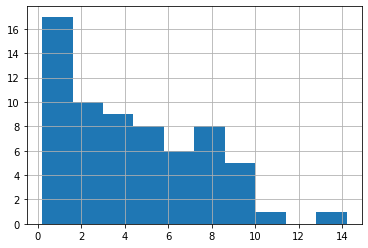

In [11]:
FWstats.Value.hist()
FWstats.sort_values('TotalPoints',ascending=False).head(10)


,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
344,Liverpool,Mohamed,Salah,Midfielder,131,1440,160,12.2
379,Man City,Bernardo Mota,Veiga de Carvalho e Silva,Midfielder,77,1343,91,11.8
198,Crystal Palace,Conor,Gallagher,Midfielder,62,1381,89,14.4
341,Liverpool,Sadio,Mané,Midfielder,119,1360,82,6.9
522,Spurs,Heung-Min,Son,Midfielder,103,1138,81,7.9
351,Liverpool,Diogo,Jota,Midfielder,80,1032,80,10.0
186,Chelsea,Mason,Mount,Midfielder,76,794,77,10.1
312,Leeds,Raphael,Dias Belloli,Midfielder,66,1258,75,11.4
603,West Ham,Jarrod,Bowen,Midfielder,65,1363,75,11.5
405,Man Utd,Bruno Miguel,Borges Fernandes,Midfielder,116,1379,70,6.0


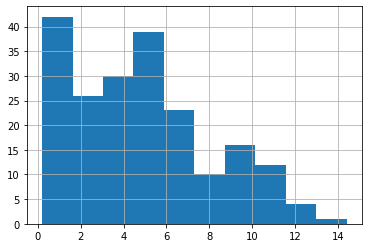

In [12]:
MFstats.Value.hist()
MFstats.sort_values('TotalPoints',ascending=False).head(10)

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
348,Liverpool,Trent,Alexander-Arnold,Defender,82,1233,108,13.2
374,Man City,João Pedro Cavaco,Cancelo,Defender,68,1427,91,13.4
340,Liverpool,Virgil,van Dijk,Defender,67,1440,83,12.4
176,Chelsea,Antonio,Rüdiger,Defender,62,1350,81,13.1
190,Chelsea,Reece,James,Defender,63,819,76,12.1
380,Man City,Rúben Santos,Gato Alves Dias,Defender,61,1342,72,11.8
21,Arsenal,Gabriel,Magalhães,Defender,52,1193,68,13.1
623,Wolves,Romain,Saïss,Defender,50,1454,65,13.0
170,Chelsea,Thiago,Emiliano da Silva,Defender,56,1051,63,11.2
533,Spurs,Sergio,Reguilón,Defender,53,1062,62,11.7


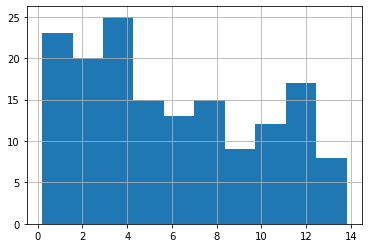

In [13]:
DFstats.Value.hist()
DFstats.sort_values('TotalPoints',ascending=False).head(10)

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
642,Wolves,José,Malheiro de Sá,Goalkeeper,51,1506,77,15.1
342,Liverpool,Alisson,Ramses Becker,Goalkeeper,60,1350,72,12.0
33,Arsenal,Aaron,Ramsdale,Goalkeeper,51,1215,71,13.9
375,Man City,Ederson,Santana de Moraes,Goalkeeper,60,1440,69,11.5
191,Chelsea,Edouard,Mendy,Goalkeeper,63,1350,68,10.8
38,Aston Villa,Emiliano,Martínez,Goalkeeper,55,1440,67,12.2
398,Man Utd,David,de Gea,Goalkeeper,51,1440,66,12.9
517,Spurs,Hugo,Lloris,Goalkeeper,54,1260,63,11.7
591,West Ham,Lukasz,Fabianski,Goalkeeper,50,1485,55,11.0
199,Crystal Palace,Vicente,Guaita,Goalkeeper,46,1440,54,11.7


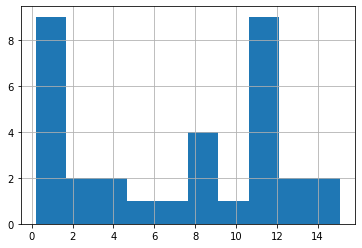

In [14]:
GKstats.Value.hist()
GKstats.sort_values('TotalPoints',ascending=False).head(10)

In [15]:
testppmp = fpl_stats
testppmp['PPMP'] = testppmp['TotalPoints'] / testppmp['MinsPlayed']
testppmp = testppmp.loc[testppmp.MinsPlayed > (testppmp['MinsPlayed'].mean())]
testppmp.sort_values('PPMP',ascending=False).head(20)

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value,PPMP
344,Liverpool,Mohamed,Salah,Midfielder,131,1440,160,12.2,0.111111
186,Chelsea,Mason,Mount,Midfielder,76,794,77,10.1,0.096977
190,Chelsea,Reece,James,Defender,63,819,76,12.1,0.092796
348,Liverpool,Trent,Alexander-Arnold,Defender,82,1233,108,13.2,0.087591
351,Liverpool,Diogo,Jota,Midfielder,80,1032,80,10.0,0.077519
383,Man City,Phil,Foden,Midfielder,80,809,61,7.6,0.075402
576,Watford,Emmanuel,Dennis,Forward,59,1168,84,14.2,0.071918
522,Spurs,Heung-Min,Son,Midfielder,103,1138,81,7.9,0.071178
278,Leicester,James,Maddison,Midfielder,68,1002,69,10.1,0.068862
379,Man City,Bernardo Mota,Veiga de Carvalho e Silva,Midfielder,77,1343,91,11.8,0.067759
